출처  
https://hihack.tistory.com/entry/Pytorch-jupyter-notebook%EC%9C%BC%EB%A1%9C-MNIST-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%85%8B-%ED%95%99%EC%8A%B5%EC%A0%95%ED%99%95%EB%8F%84-loss-%EC%B8%A1%EC%A0%95

In [1]:
import torch.nn as nn 
import torch 
from torchvision import datasets 
from torchvision import transforms 
from torch.utils.data import DataLoader 
import numpy as np 
import torch.optim as optim 
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
        self.fc1 = nn.Linear(784,100) 
        self.relu = nn.ReLU() 
        self.fc2 = nn.Linear(100,100) 
        self.fc3 = nn.Linear(100,10) 
    def forward(self, x): 
        x1 = self.fc1(x) 
        x2 = self.relu(x1) 
        x3 = self.fc2(x2) 
        x4 = self.relu(x3) 
        x5 = self.fc3(x4) 
        return x5

In [3]:
download_root = 'MNIST_data/' 
dataset1 = datasets.MNIST(root=download_root,
                          train=True,
                          transform = transforms.ToTensor(),
                          download=True
                         )
dataset2 = datasets.MNIST(root=download_root,
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True
                         )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [4]:
batch_s = 100
dataset1_loader = DataLoader(dataset1, batch_size=batch_s, shuffle=True)
dataset2_loader = DataLoader(dataset2, batch_size=batch_s, shuffle=True)

In [5]:
model = Net() 
model.zero_grad() 
loss_function = nn.CrossEntropyLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
total_batch = len(dataset1_loader)
epochs = np.arange(1,11)
print(epochs)
print(len(dataset1_loader)) #60000개의 data를 batch_size를 100으로 했기 때문에 600이 나오는 것.

[ 1  2  3  4  5  6  7  8  9 10]
600


In [8]:
loss_list = []
accuracy_list = []
for epoch in epochs:
    cost=0
    for images, labels in dataset1_loader:
        images = images.reshape(100,784)
        optimizer.zero_grad() # 변화도 매개변수 0 
        #forward
        pred = model.forward(images)
        loss = loss_function(pred, labels)
        #backward
        loss.backward()
        #Update
        optimizer.step()
        cost += loss
    with torch.no_grad(): #미분하지 않겠다는 것
        total = 0
        correct=0
        for images, labels in dataset2_loader: 
            images = images.reshape(100,784)
            outputs = model(images)
            _,predict = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predict==labels).sum() # 예측한 값과 일치한 값의 합
    avg_cost = cost / total_batch 
    accuracy = 100*correct/total 
    loss_list.append(avg_cost.detach().numpy()) 
    accuracy_list.append(accuracy) 
    print("epoch : {} | loss : {:.6f}" .format(epoch, avg_cost)) 
    print("Accuracy : {:.2f}".format(100*correct/total)) 
    print("------")

epoch : 1 | loss : 2.107857
Accuracy : 67.28
------
epoch : 2 | loss : 0.977983
Accuracy : 84.50
------
epoch : 3 | loss : 0.527121
Accuracy : 87.78
------
epoch : 4 | loss : 0.425704
Accuracy : 89.11
------
epoch : 5 | loss : 0.378315
Accuracy : 89.89
------
epoch : 6 | loss : 0.348762
Accuracy : 90.76
------
epoch : 7 | loss : 0.327211
Accuracy : 91.15
------
epoch : 8 | loss : 0.309582
Accuracy : 91.60
------
epoch : 9 | loss : 0.295230
Accuracy : 91.93
------
epoch : 10 | loss : 0.282345
Accuracy : 92.39
------


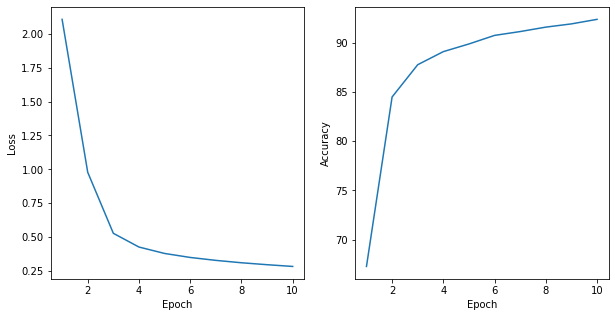

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.plot(epochs,loss_list)
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epochs, accuracy_list)
plt.show()